<h4>
     ! Import the code by running the cell below !

In [1]:
from QuOpticsMainProject import *

<h1>
    Qu-OPTICS Simulating open quantum systems
</h1>

This notebook provides the results and analysis for the main project for the FOSE7702, by Adem Ozer. 

In this notebook we will examine simple open quantum systems,  the dynamics of which can be evaluated using <a href="https://qutip.org/index.html">QuTiP</a>. QuTiP will provide the majority of the tools needed to study the dynamics.
<br>

The main focus of this notebook will use QuTiP's master equation solver <code>mesolve()</code>. Using this solver we need only define an intial state $\rho_0$ and a Hamiltonian $H$. The master equation describing the states dynamics is given below.

<h3>
    $$ \dot\rho(t)  = -\frac{i}{\hbar} \left[H(t),\rho(t)\right] + \sum_n \frac{1}{2}\left[2 C_n \rho(t) C_n^{\dagger}-\rho(t) C_n^{\dagger} C_n-C_n^{\dagger} C_n \rho(t)\right] $$
    $$
    \begin{aligned}
        & C_1=\sqrt{\gamma(1+\langle \hat{n}_{E}\rangle)} a \\
        & C_2=\sqrt{\gamma\langle \hat{n}_{E}\rangle} a^{\dagger}
    \end{aligned}
    $$

Lets briefly make some comments on the equation above. Firstly we note that in the cases we consider in this notebook will include only time independent Hamiltonians. In fact the Hamiltonians we are interested in are those of a single-mode harmonic oscillator. As such we need only consider $a$ and $a^\dagger$ operators. We can then define the collapse operators as
 <br> <br>
 $$
\begin{aligned}
    & C_1=\sqrt{\gamma(1+\langle \hat{n}_{E}\rangle)} a, \\
    & C_2=\sqrt{\gamma\langle \hat{n}_{E}\rangle} a^{\dagger}.
\end{aligned}
$$<br>
     These operators will couple the system (the single-mode harmonic oscillator) to the environment (thermal bath) at a rate determined by the environments population $\langle \hat{n}_{E}\rangle$ and a coupling strength $\sqrt{\gamma}$. Notice that the collapse or jump operator which corresponds to the de-excitation of the cavity or a photon 'leaving' to the environment is governed by $\langle \hat{n}_{E}\rangle + 1$, this makes physical sense, as it ensure that a cavity with more than on excitation may still decay into the environment even if the environment is the vacuum. We should also note that the density operator $\rho(t)$ is the reduced density matrix after the environmental degrees of freedom are traced over. <br> <br>
    
To arrive to the master equation seen above various assumptions for the system have been made. The first is the system separability such that for some initial time $t=0$ the combined system-environment density operator $\rho_W$ could be written in the separable form $\rho_W(0) = \rho_S(0)\otimes\rho_E(0) $. <br>

Secondly we assume that environment coherence time $\tau_E \ll \tau_S$ where $\tau_S$ is the system coherence time. This is the Markov approximation and physically corresponds to the environment losing all coherence or information which was once contained in the cavity at a rate significantly faster the cavity lifetime. This means the information is ostensibly lost to the enthronement once it has left the cavity. <br> 

Similar to the Markov approximation is the Born approximation which states that the impact of the cavity on the environment is small enough that we can consider the environment separable from the system at all times. The Born approximation allows us to write $\rho_W(t) = \rho_S(t) \otimes \rho_E$.              

As mentioned above  we will consider only a time independant Hamiltonian of a harmonic oscillator, which as an open system can be described as a damped-harmonic oscilator. In fact will will consider a damped-harmonic oscilator with three distinct contributions which can be seen below 

<h3>
        $$ H = \underbrace{a^{\dagger} a}_{\mathrm{H-O}}  + \underbrace{\Omega ( a^{\dagger} +a)}_{\mathrm{Driving}} + \underbrace{\kappa(a^{\dagger}aa^{\dagger}a)}_{\mathrm{Kerr~non-linearity}}, $$

where we ignore the vacuum energy and set $\hbar = \omega =1$ where $\omega$ is the harmonic oscillator frequency. To compare how the system evolves we will evaluate the master equation and choose to include terms to the harmonic oscillator as we please. This affords us with an ability to draw on our classical intuition of the dynamics of a damped harmonic oscillator. 

<h4> To begin the computation run the cells below

In [2]:
# Define the time list
tlist = np.linspace(0, 100, 100)

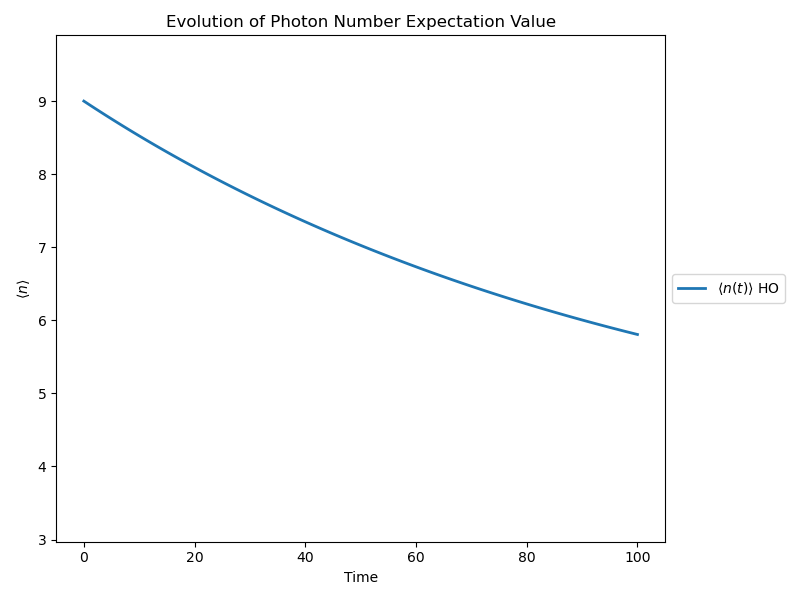

In [3]:
#Display interactive plot
Plot_HO(tlist)

From the above plots we have the ability to examine the system dynamics and simply adjust the sliders to change the behaviour of the system and environment interaction. This code works by running the QuTiP master equation solver <code>mesolve()</code> and storing the states as they are evaluated through time. 

Next let's explore some of the inbuilt QuTiP functions to gain further insight into the dynamics of the systems. Lets start by using a modified example of the QuTiP function <code>ani_fock_distribution()</code>. This allows us both an ability to see the instantaneous Fock distribution of the state $\rho$ and also see this evolve as we include terms in the Hamiltonian or change coupling strengths. To do this run the cell containing the function <code>Plot_Fock(tlist)</code> below.

In [4]:
Plot_Fock(tlist)

Output()

From the above we now see that although the $\langle \hat{n}\rangle$ plots we have seen from <code>Plot_HO()</code> provides some insight into the system, when we examine the Fock distributions we can much more clearly visualise the effects of driving and how the system may eventual return to a thermal state. 

<h2>
    Now lets quantify this similarity.
</h2>
<hr>
Recall the quadrature operators
$$
\hat{x} = \frac{\hat{a} + \hat{a}^\dagger}{\sqrt{2}}, \quad \hat{p} = \frac{\hat{a} - \hat{a}^\dagger}{i\sqrt{2}}.
$$
<br>
We know that a <b>coherent state</b> will have a mean photon number $ \langle \hat{n} \rangle = |\alpha|^2 $ and the variance for the coherent state will be $\Delta x_{\text{coh}} = \Delta p_{\text{coh}} = \frac{1}{\sqrt{2}}$ so that 
$$\Delta x_{\text{coh}} \cdot \Delta p_{\text{coh}} = \frac{1}{2}.$$

For the thermal states we expect $\Delta x_{\text{th}} = \Delta p_{\text{th}} = \sqrt{\frac{2 n_{\text{th}} + 1}{2}}$ and so 
$$\Delta x_{\text{th}} \cdot \Delta p_{\text{th}} = \frac{2 n_{\text{th}} + 1}{2} \geq \frac{1}{2}.$$
<br> <br>

Using this knowledge we can then identify that for the steady state solution $\rho_{ss}$ found by QuTiP, that should we find $ \Delta x \cdot \Delta p > \frac{1}{2} $, we conclude the state is likely thermal. Consequently if $ \Delta x \cdot \Delta p  \approx \frac{1}{2} $, the state is likely a coherent state.

Furthermore we may use the number operate variances to gleen similar information, as for thermal states and coherent states we expect 
$$ \Delta N_{\text{th}} = \sqrt{n_{\text{th}}^2 + n_{\text{th}}}, \quad \Delta N_{\text{coh}} = \sqrt{\langle \hat{n} \rangle} = \alpha. $$

<h3>
So now lets now examine just how similar the system is to a thermal or coherent state in the steady state by running the cell below.   

In [5]:
Examine_Steady_State()

Output()

<h4>Note:    
    In the plot above we generate the thermal state using QuTip's <code>thermal_dm(N,n_th)</code> where N is the $\mathrm{Dim}(\mathcal{H})$ and n_th is the bath temp.
    
Similar for the coherent state, we take $\langle n\rangle$ for the steady state soln. and use this to generate a coherent state using qutip <code>thermal_dm(N,alpha)</code> where we set we set $\alpha = (\langle n\rangle)^{1/2}$
</h4>

<hr>
<h2>
    Phase space distributions
</h2>

Now we journey into the phase space quasi-probability distribution tools available in QuTiP. <br>

We start by looking at the same system and plotting the Wigner distribution as the state evolves. 

In [6]:
# Define the time list
tlist = np.linspace(0, 50, 50)

# Define the size of phase space to plot in
xvec = np.linspace(-5, 5, 200)


Plot_Wigner(tlist,xvec)

Output()

<h3>
Or in 3D we can plot the Wigner distribution

In [7]:
tlist = np.linspace(0, 100, 100)
xvec = np.linspace(-5, 5, 200)
Plot_Wigner_3D(tlist, xvec)

Output()

<h2>
    Similarly we plot the Husimi Q fucntion.

In [8]:
Plot_Q(tlist,xvec)

Output()

In [9]:
Plot_Q_3D(tlist,xvec)

Output()

If we want to continue to check for classicality we can use the  <code>Demonstrate_NonClassicality()</code> function below. Here we compute the Wigner distribution for the steady-state $\rho$. If the Wigner distribution $W(\alpha) < 0$ we identify that the state is non-classical. Conversely if $W(\alpha) \geq 0$ everywhere, then we infer that the state may be classical. <br>
We can also compute the Mandel Q Parameter defined as 
$$
Q = \frac{\mathrm{Var}(\hat{n}) - \langle \hat{n} \rangle}{\langle \hat{n} \rangle} = \langle \hat{n} \rangle \left( g^{(2)}(0) - 1\right).
$$
If we find that $Q$ is negative this indicates sub-Poissonian statistics (that is the variance of photon number is less than the mean), which implies the state may be non-classical. For a positive or zero $Q$ the state is Poissonian which is indicative of coherent states or super-Poissonian statistics for thermal states.

<h3>Note:</h3> 
So far we've been writing the Hamiltonian as $H = a^{\dagger} a  + \Omega ( a^{\dagger} +a) + \kappa(a^{\dagger}aa^{\dagger}a),$ which assumes the driving field and the H-O are inphase, or rather that $\Omega \in \mathbb{R}$. We don't need to make this assumption and can write the Hamiltonian with $\Omega \in \mathbb{C}$ as <br><br>
        $${\large H = a^{\dagger} a  + \underline{{\Large(\Omega a^{\dagger} + \Omega^* a)}} + \kappa(a^{\dagger}aa^{\dagger}a).}$$

Equivalently lets write the driving term in the Hamiltonian as $H_D = |\Omega| ( e^{i\phi} a^{\dagger} +e^{-i\phi}a)$ and implement this in the code below.

In [10]:
Demonstrate_NonClassicality()

Output()

<h1>
    Stochastic Solvers
</h1>

QuTiP offers stochastic solvers to simulate open quantum systems. The primary solver is the Monte Carlo wave function <code>mcsolve()</code>. In this solver QuTiP simulates individual quantum trajectories by applying random quantum jumps to the state vector. To do this the environment needs to be continuously monitored. Whilst this monitoring is occurring in the environment, if the environment gains information about the state of the system, we then implement a quantum jump.<br>

Specifically for <code>mcsolve()</code> the system evolves according to the Schrödinger equation with a non-Hermitian effective Hamiltonian
$$
H_{\mathrm{eff}}=H_{\mathrm{sys}}-\frac{i \hbar}{2} \sum_i C_n^{\dagger} C_n.
$$
Since the information is only ever being lost by the system when one computes the norm of the state after some small time $\delta t$ we have $\langle\psi(t+\delta t) \mid \psi(t+\delta t)\rangle=1-\delta p$, as the <i>non-hermitianicity(?)</i> is strictly negative. Since we know the terms responsible for the reduction in the information we can find $\delta p$ as
$$
\delta p=\delta t \sum_n\langle\psi(t)| C_n^{\dagger} C_n|\psi(t)\rangle.
$$
So we have that the probability of the state <i>not changing</i> is given by $\delta p$. However this does not distinguish between collapse operators, thus for each collapse operator $C_i$ the probability is found as 
$$
P_i(t) = \frac{1}{\delta p} \langle\psi(t)| C_i^{\dagger} C_i|\psi(t)\rangle.
$$
QuTip then chooses a random number $r \in [0,1]$, evolves the state according to $H_{\mathrm{eff}}$ for some time $\tau$ such that $ \langle\psi(\tau)|\psi(\tau)\rangle = r$, then applies a collapse operate to the state, renormalises and repeats.

This approach can be efficient for some systems but requires averaging over many trajectories to reconstruct the ensemble behaviour. We can see the influence of the quantum jump effects in individual runs and compare this to the master equation solver <code>mesolve()</code> by running the function <code>Plot_Stochastic_Simulations()</code> in the cell below.

In [11]:
# Define the time list
tlist = np.linspace(0, 10, 50)
Plot_Stochastic_Simulations(tlist)

Output()